In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from gpu_helpers import init_all_gpu
init_all_gpu()

In [2]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


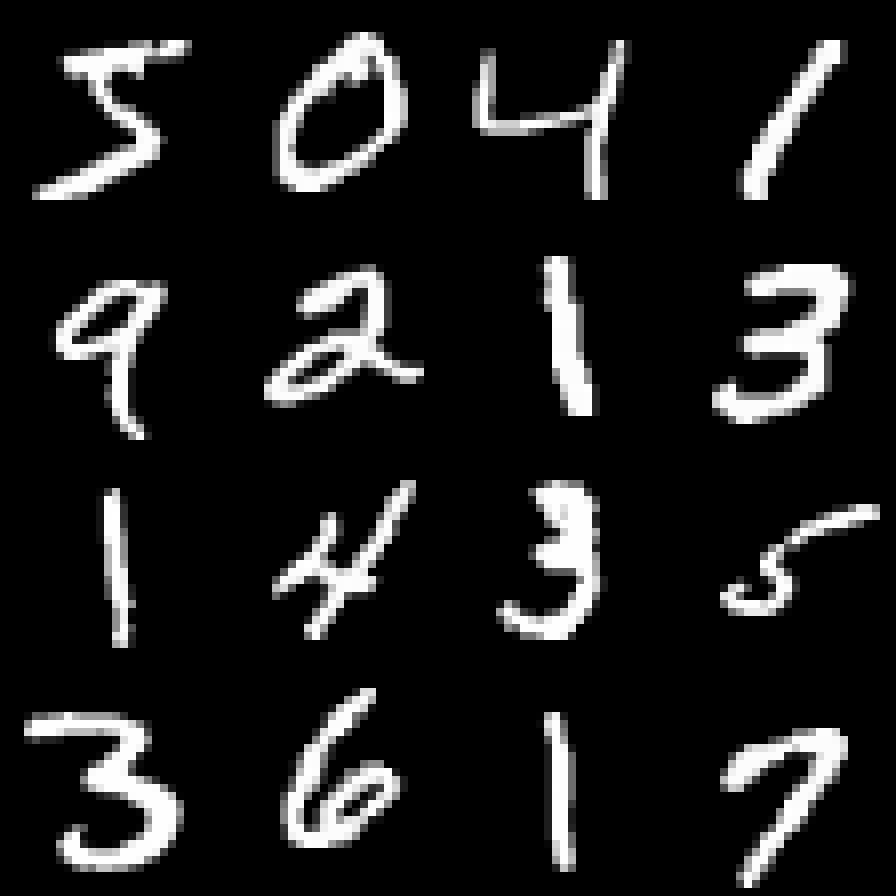

In [3]:
from IPython.display import Image
from PIL import Image
import numpy as np
a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [4]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train = x_train[:100]
y_train = y_train[:100]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


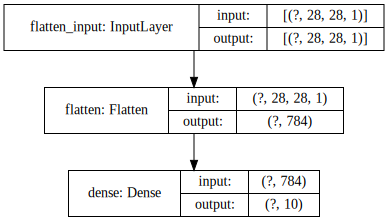

In [7]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog='dot', format='svg'))

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 20

In [10]:
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1/1 [==============================] - 0s 111ms/step - loss: 2.4977 - accuracy: 0.0800 - val_loss: 2.4013 - val_accuracy: 0.1034
Epoch 2/20
1/1 [==============================] - 0s 44ms/step - loss: 2.4222 - accuracy: 0.1300 - val_loss: 2.3560 - val_accuracy: 0.1187
Epoch 3/20
1/1 [==============================] - 0s 42ms/step - loss: 2.3492 - accuracy: 0.1500 - val_loss: 2.3132 - val_accuracy: 0.1365
Epoch 4/20
1/1 [==============================] - 0s 50ms/step - loss: 2.2787 - accuracy: 0.1600 - val_loss: 2.2728 - val_accuracy: 0.1613
Epoch 5/20
1/1 [==============================] - 0s 48ms/step - loss: 2.2109 - accuracy: 0.1600 - val_loss: 2.2347 - val_accuracy: 0.1868
Epoch 6/20
1/1 [==============================] - 0s 41ms/step - loss: 2.1454 - accuracy: 0.2300 - val_loss: 2.1987 - val_accuracy: 0.2128
Epoch 7/20
1/1 [==============================] - 0s 51ms/step - loss: 2.0824 - accuracy: 0.2700 - val_loss: 2.1646 - val_accuracy: 0.2429
Epoch 8/20
1/1 [==========

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8194161653518677
Test accuracy: 0.46970000863075256


In [12]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
    'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.497726
1        1  Loss auf Trainingsdaten  2.422158
2        2  Loss auf Trainingsdaten  2.349172
3        3  Loss auf Trainingsdaten  2.278750
4        4  Loss auf Trainingsdaten  2.210852
5        5  Loss auf Trainingsdaten  2.145422
6        6  Loss auf Trainingsdaten  2.082390
7        7  Loss auf Trainingsdaten  2.021680
8        8  Loss auf Trainingsdaten  1.963211
9        9  Loss auf Trainingsdaten  1.906903
10      10  Loss auf Trainingsdaten  1.852666
11      11  Loss auf Trainingsdaten  1.800401
12      12  Loss auf Trainingsdaten  1.749997
13      13  Loss auf Trainingsdaten  1.701333
14      14  Loss auf Trainingsdaten  1.654284
15      15  Loss auf Trainingsdaten  1.608729
16      16  Loss auf Trainingsdaten  1.564551
17      17  Loss auf Trainingsdaten  1.521652
18      18  Loss auf Trainingsdaten  1.479946
19      19  Loss auf Trainingsdaten  1.439370
20       0       Loss auf Testdate

In [13]:
import altair as alt
#alt.renderers.enable('notebook')

In [14]:
chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

alt.LayerChart(...)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


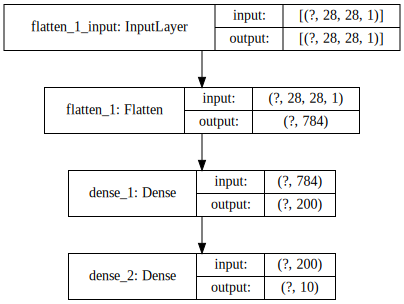

In [15]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog='dot', format='svg'))

In [16]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1/1 [==============================] - 0s 118ms/step - loss: 2.4451 - accuracy: 0.0400 - val_loss: 2.2485 - val_accuracy: 0.1443
Epoch 2/20
1/1 [==============================] - 0s 65ms/step - loss: 2.1688 - accuracy: 0.1900 - val_loss: 2.1132 - val_accuracy: 0.3371
Epoch 3/20
1/1 [==============================] - 0s 67ms/step - loss: 1.9342 - accuracy: 0.4600 - val_loss: 2.0012 - val_accuracy: 0.4330
Epoch 4/20
1/1 [==============================] - 0s 66ms/step - loss: 1.7331 - accuracy: 0.6500 - val_loss: 1.9043 - val_accuracy: 0.4694
Epoch 5/20
1/1 [==============================] - 0s 72ms/step - loss: 1.5575 - accuracy: 0.7300 - val_loss: 1.8152 - val_accuracy: 0.5050
Epoch 6/20
1/1 [==============================] - 0s 70ms/step - loss: 1.3989 - accuracy: 0.7900 - val_loss: 1.7285 - val_accuracy: 0.5357
Epoch 7/20
1/1 [==============================] - 0s 66ms/step - loss: 1.2519 - accuracy: 0.8300 - val_loss: 1.6422 - val_accuracy: 0.5678
Epoch 8/20
1/1 [==========

In [17]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
        'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
    })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

In [18]:
evaluate(model, history)

Test loss: 1.0492427349090576
Test accuracy: 0.680400013923645


alt.LayerChart(...)

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


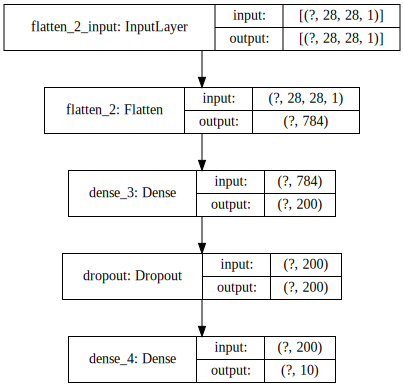

In [20]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog='dot', format='svg'))

In [21]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/12
469/469 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8733 - val_loss: 0.1907 - val_accuracy: 0.9447
Epoch 2/12
469/469 [==============================] - 1s 2ms/step - loss: 0.2179 - accuracy: 0.9373 - val_loss: 0.1380 - val_accuracy: 0.9602
Epoch 3/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9495 - val_loss: 0.1139 - val_accuracy: 0.9660
Epoch 4/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1477 - accuracy: 0.9566 - val_loss: 0.0977 - val_accuracy: 0.9704
Epoch 5/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9614 - val_loss: 0.0893 - val_accuracy: 0.9726
Epoch 6/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9648 - val_loss: 0.0803 - val_accuracy: 0.9754
Epoch 7/12
469/469 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9678 - val_loss: 0.0797 - val_accuracy: 0.9763
Epoch 

In [22]:
evaluate(model, history)

Test loss: 0.0686497837305069
Test accuracy: 0.9786999821662903


alt.LayerChart(...)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               1843400   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)              

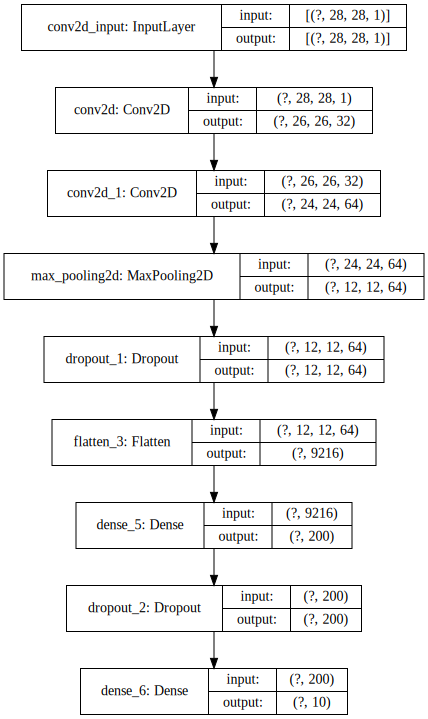

In [23]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog='dot', format='svg'))

![Struktur des Convolutional Network](Convnet.svg)

In [24]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/12
469/469 [==============================] - 18s 39ms/step - loss: 0.1994 - accuracy: 0.9393 - val_loss: 0.0461 - val_accuracy: 0.9858
Epoch 2/12
469/469 [==============================] - 18s 38ms/step - loss: 0.0691 - accuracy: 0.9793 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 3/12
469/469 [==============================] - 18s 39ms/step - loss: 0.0501 - accuracy: 0.9844 - val_loss: 0.0339 - val_accuracy: 0.9876
Epoch 4/12
469/469 [==============================] - 19s 39ms/step - loss: 0.0413 - accuracy: 0.9868 - val_loss: 0.0315 - val_accuracy: 0.9889
Epoch 5/12
469/469 [==============================] - 18s 39ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0259 - val_accuracy: 0.9913
Epoch 6/12
469/469 [==============================] - 18s 39ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: 0.0356 - val_accuracy: 0.9890
Epoch 7/12
469/469 [==============================] - 18s 39ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0280 - val_accuracy:

In [25]:
evaluate(model, history)

Test loss: 0.026657329872250557
Test accuracy: 0.9922999739646912


alt.LayerChart(...)

Schöne 3D-Visualisierung eines Convolutional Networks für MNIST: http://scs.ryerson.ca/~aharley/vis/conv/